In [1]:
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import scipy as sp
from IPython.display import display

In [2]:
x,y,h, r, th, q, q1, q2,eps0, U = sym.symbols("x y h r theta q q_1 q_2 epsilon_0 U", real=True, positive=True)

The value for $\epsilon_0$

In [3]:
eps0_val = 8.8541878128e-12

The potential of a charge at a given location to a point distance r from its origin is the following:

In [4]:
# elementary charge in coulombs
elem_charge = 1.60218e-19

In [5]:
e = -q1/(4*sym.pi * eps0 * r)
e

-q_1/(4*pi*epsilon_0*r)

In [6]:
e1 = -q1/(4*sym.pi*eps0*(sym.sqrt(x**2+(y+h)**2))) - q2/(4*sym.pi*eps0*(sym.sqrt(x**2+(y-h)**2)))
e1

-q_1/(4*pi*epsilon_0*sqrt(x**2 + (h + y)**2)) - q_2/(4*pi*epsilon_0*sqrt(x**2 + (-h + y)**2))

In [7]:
e2 = e1.subs([(x, r*sym.cos(th)),(y, r*sym.sin(th))])
e2

-q_1/(4*pi*epsilon_0*sqrt(r**2*cos(theta)**2 + (h + r*sin(theta))**2)) - q_2/(4*pi*epsilon_0*sqrt(r**2*cos(theta)**2 + (-h + r*sin(theta))**2))

In [8]:
e2.subs(th, 0)

-q_1/(4*pi*epsilon_0*sqrt(h**2 + r**2)) - q_2/(4*pi*epsilon_0*sqrt(h**2 + r**2))

Anywhere along the midline (y = 0) the electric field between opposite charges cancel out

In [9]:
e2.subs([(th, 0), (q1, -q2)])

0

In [10]:
e22 = e2.subs(th, sym.pi/2)
e22

-q_1/(4*pi*epsilon_0*(h + r)) - q_2/(4*pi*epsilon_0*Abs(h - r))

In [11]:
e22f = e22.subs([(h, 5), (q1, -elem_charge), (q2, elem_charge), (eps0, eps0_val)])
e22f

-4.52379154890926e-9/(pi*Abs(r - 5)) + 4.52379154890926e-9/(pi*(r + 5))

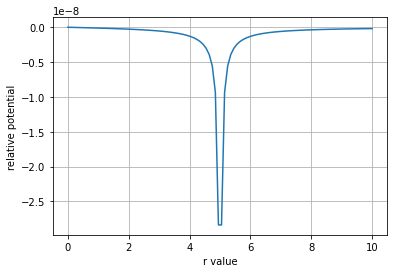

In [12]:
fig, ax = plt.subplots()

f = sym.lambdify(r, e22f)
rvals=np.linspace(0,10, 100)

ax.plot(rvals, f(rvals))
ax.set_xlabel('r value')
ax.set_ylabel('relative potential')

ax.grid()

In [13]:
sym.cancel(e2.subs([(th, sym.pi/2), (q1, -q2)]))

(-h*q_2 - q_2*r + q_2*Abs(h - r))/(4*pi*epsilon_0*h*Abs(h - r) + 4*pi*epsilon_0*r*Abs(h - r))

In [14]:
e42 = e2.subs(th, 3*sym.pi/2)
e42

-q_1/(4*pi*epsilon_0*Abs(h - r)) - q_2/(4*pi*epsilon_0*(h + r))

In [15]:
e42f = e42.subs([(h, 5), (q1, -elem_charge), (q2, elem_charge), (eps0, eps0_val)])
e42f

4.52379154890926e-9/(pi*Abs(r - 5)) - 4.52379154890926e-9/(pi*(r + 5))

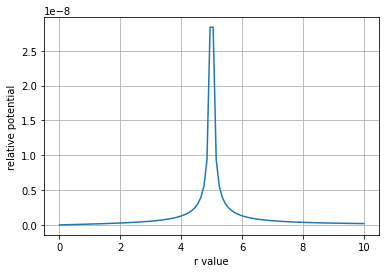

In [16]:
fig, ax = plt.subplots()


f = sym.lambdify(r, e42f)

rvals=np.linspace(0,10, 100)

ax.plot(rvals, f(rvals))
 
ax.set_xlabel('r value')
ax.set_ylabel('relative potential')
#ax.set_ylim(-1e-9,1e-9)
ax.grid()

In [17]:
e2.subs([(th, sym.pi), (q1, -q2)])

0

In [18]:
e2.subs(th, sym.pi/4)


-q_1/(4*pi*epsilon_0*sqrt(r**2/2 + (h + sqrt(2)*r/2)**2)) - q_2/(4*pi*epsilon_0*sqrt(r**2/2 + (-h + sqrt(2)*r/2)**2))

In [19]:
e2.subs(th, 3*sym.pi/4)


-q_1/(4*pi*epsilon_0*sqrt(r**2/2 + (h + sqrt(2)*r/2)**2)) - q_2/(4*pi*epsilon_0*sqrt(r**2/2 + (-h + sqrt(2)*r/2)**2))

In [20]:
e2.subs(th, 5*sym.pi/4)


-q_1/(4*pi*epsilon_0*sqrt(r**2/2 + (h - sqrt(2)*r/2)**2)) - q_2/(4*pi*epsilon_0*sqrt(r**2/2 + (-h - sqrt(2)*r/2)**2))

In [21]:
e2.subs(th, 7*sym.pi/4)

-q_1/(4*pi*epsilon_0*sqrt(r**2/2 + (h - sqrt(2)*r/2)**2)) - q_2/(4*pi*epsilon_0*sqrt(r**2/2 + (-h - sqrt(2)*r/2)**2))

In [22]:
e2.subs(th, 3*sym.pi/2)

-q_1/(4*pi*epsilon_0*Abs(h - r)) - q_2/(4*pi*epsilon_0*(h + r))

To work out the vector directions of each charge

In [60]:
# dimensions stand for x, y and q (in coulombs)
charges = np.array([[0, 0], [5, -5], [elem_charge, -elem_charge], ['green', 'red']]).T
charges

array([['0', '5', '1.60218e-19', 'green'],
       ['0', '-5', '-1.60218e-19', 'red']], dtype='<U32')

In [61]:
e3 = e2.subs([(h, 5), (q1, -elem_charge), (q2, elem_charge), (eps0, eps0_val)])
e3

4.52379154890926e-9/(pi*sqrt(r**2*cos(theta)**2 + (r*sin(theta) + 5)**2)) - 4.52379154890926e-9/(pi*sqrt(r**2*cos(theta)**2 + (r*sin(theta) - 5)**2))

In [62]:
e3.subs(th, sym.pi/2)

-4.52379154890926e-9/(pi*Abs(r - 5)) + 4.52379154890926e-9/(pi*(r + 5))

In [26]:
e3fn = sym.lambdify([r, th], e3)


In [27]:
e3fn(7,sp.pi/2)

-5.999864887718752e-10

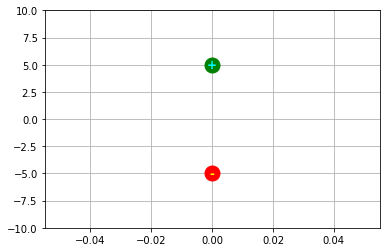

In [28]:
fig, ax = plt.subplots()
#plt.rcParams["figure.autolayout"] = True
for charge in charges:
    ax.plot(int(charge[0]), int(charge[1]), 'o', ms=15, color=charge[3])

#ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
plt.annotate('+', (0, 5), ha='center', va='center', size='large', c='cyan', weight='bold')
plt.annotate('-', (0, -5), ha='center', va='center', size='large', c='yellow', weight='bold')
ax.grid()

In [29]:
from scipy.optimize import root_scalar
from functools import partial

In [30]:
print (e3fn(1, sp.pi/2))
print (e3fn(5, sp.pi/2))

-1.1999729775437505e-10
-4703291.019272046


5e-11
-4703291.019272046


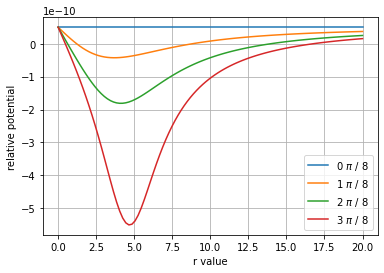

In [31]:
fig, ax = plt.subplots()

cval = -5e-11
f = lambda r, th: e3fn(r, th) -cval

print (f(0,sp.pi/2))
print (f(5,sp.pi/2))
#r1 = root_scalar(f, x0=.5, x1=1, args=(sp.pi/2,), method='secant', bracket=(0,5), rtol=1e-4)



rvals=np.linspace(0,20, 100)
angles = np.arange(0, 4)
for ang in angles:
    ff = np.vectorize(lambda x: f(x, sp.pi*ang/8))
    ax.plot(rvals, ff(rvals), label="{} $\pi$ / 8".format(ang))
 
ax.legend()
ax.set_xlabel('r value')
ax.set_ylabel('relative potential')
#ax.set_ylim(-1e-9,1e-9)
ax.grid()

In [32]:
fields = np.array([], dtype=float)
hval = 5
fields

array([], dtype=float64)

In [33]:
fn = sym.lambdify( [x,y],  e1.subs([(eps0, eps0_val),(q1, -elem_charge), (q2, elem_charge), (h,hval)]))

In [34]:
fn(2,3)

-3.344837001159094e-10

In [35]:
ev1 = q1/(4*sym.pi * eps0 * (x**2+(y+h)**2)) 
ev2 = q2/(4*sym.pi * eps0 * (x**2+(y-h)**2))
display(ev1)
display(ev2)


q_1/(4*pi*epsilon_0*(x**2 + (h + y)**2))

q_2/(4*pi*epsilon_0*(x**2 + (-h + y)**2))

In [36]:
evsubs = (ev1+ev2).subs([(eps0, eps0_val),(q1, -elem_charge), (q2, elem_charge), (h,hval)])
evsubs

-4.52379154890926e-9/(pi*(x**2 + (y + 5)**2)) + 4.52379154890926e-9/(pi*(x**2 + (y - 5)**2))

In [37]:
evfn = sym.lambdify([x,y], evsubs)

In [38]:
evfn(2,3)

1.5881995291020227e-10

In [39]:
ev = q/(4*sym.pi * eps0 * (x**2+y**2)).subs(eps0, eps0_val) 
evfn = sym.lambdify([x,y,q], ev)
display(ev)

28235226684.3255*q/(pi*(x**2 + y**2))

In [40]:
def compute_efield(charges, xin, yin):
    total = np.array([0,0], dtype=float)
    for x,y,qval in charges[:,:3].astype(float):
        efield = evfn(x-xin,y-yin,qval)
        #print (x,y,qval, efield)
        dvec = np.array([xin-x, yin-y])
        #print (dvec/np.linalg.norm(dvec))
        total += efield * dvec/np.linalg.norm(dvec)
    return (total)



In [41]:
print (compute_efield(charges, 5,5.00001))

[ 5.24469307e-11 -1.03034396e-11]


In [42]:
compute_efield(charges, 2, 3)

array([ 1.22140422e-10, -1.47820086e-10])

In [43]:
def compute_lines(point, num_lines=40, sectors=12, direction=1, segment_length = .12):
    #sectors = 24
    #num_lines =60
    x,y = point

    radial_length = segment_length
    radial_offset = 0.1
    arr = [[] for i in range(sectors)]

    for idx ,ang in enumerate(np.linspace(0, 2*np.pi, sectors, endpoint=False)):
        v = (radial_offset*np.cos(ang)+x, radial_offset*np.sin(ang)+y)
        arr[idx].append(v)

    for ii in range(0,num_lines):
        for idx ,ang in enumerate(np.linspace(0, 2*np.pi, sectors)):
            lx, ly = arr[idx][-1]
            efield = compute_efield(charges, lx, ly)
            evec = efield/np.linalg.norm(efield)*radial_length*direction
            #print ((lx,ly),evec)
            eveccum = evec + np.array([lx,ly])
            arr[idx].append(tuple(eveccum.tolist()))
    return arr




In [83]:
def charge_lines(charges, num_lines=100, sectors=24, segment_length = .12):
    nparrs = []
    for charge in charges:
        xval = float(charge[0])
        yval = float(charge[1])
        if float(charge[2]) > 0:
            direction = 1
        else:
            direction = -1
        nparr = np.array(compute_lines((xval, yval), num_lines=num_lines, sectors=sectors, segment_length=segment_length, direction = direction ))
        nparrs.append(nparr)
        
    return nparrs

In [84]:
# dimensions stand for x, y and q (in coulombs)
charges = np.array([[0, 0], [5, -5], [elem_charge, -elem_charge], ['green', 'red']]).T
charges

array([['0', '5', '1.60218e-19', 'green'],
       ['0', '-5', '-1.60218e-19', 'red']], dtype='<U32')

In [85]:
nparrs = charge_lines(charges)

In [136]:
nparrs[0]

array([[[ 5.1       ,  5.        ],
        [ 5.15      ,  5.00000686],
        [ 5.2       ,  5.00002436],
        ...,
        [14.88545333,  6.30863051],
        [14.93406041,  6.32035021],
        [14.98266041,  6.33209927]],

       [[ 5.09659258,  5.0258819 ],
        [ 5.1448873 ,  5.03882873],
        [ 5.19317959,  5.05178461],
        ...,
        [14.27845528,  8.66866199],
        [14.3229193 ,  8.69153012],
        [14.36736868,  8.71442668]],

       [[ 5.08660254,  5.05      ],
        [ 5.12990135,  5.07500426],
        [ 5.17319636,  5.10001511],
        ...,
        [13.0738727 , 10.86527895],
        [13.11121304, 10.89853101],
        [13.14852948, 10.93180988]],

       ...,

       [[ 5.07071068,  4.92928932],
        [ 5.10607064,  4.8939386 ],
        [ 5.14143797,  4.85859526],
        ...,
        [13.47067182, -0.1328884 ],
        [13.51714242, -0.15134061],
        [13.56362317, -0.16976722]],

       [[ 5.08660254,  4.95      ],
        [ 5.12990737,  4.92

RuntimeError: Can not put single artist in more than one figure

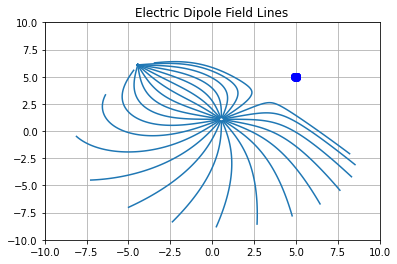

In [138]:
fig, ax = plt.subplots()
for x,y in nparr[:,0]:
    ax.plot(x,y, 'o', color='blue')
ax.grid()
ax.set_xlim(-10, 10)
ax.set_ylim(-10,10)
ax.set_title("Electric Dipole Field Lines")

for nparr in nparrs:
    lines = LineCollection(nparr)
    ax.add_collection(lines)
for charge in charges:
    ax.plot(float(charge[0]), float(charge[1]), 'o', ms=10, color=charge[3])

In [87]:
# dimensions stand for x, y and q (in coulombs)
charges = np.array([[0, 0], [5, -5], [elem_charge, elem_charge], ['green', 'green']]).T
charges

array([['0', '5', '1.60218e-19', 'green'],
       ['0', '-5', '1.60218e-19', 'green']], dtype='<U32')

In [88]:
nparrs = charge_lines(charges)

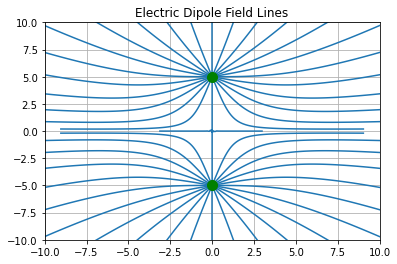

In [89]:
fig, ax = plt.subplots()
for x,y in nparr[:,0]:
    ax.plot(x,y, 'o', color='blue')
ax.grid()
ax.set_xlim(-10, 10)
ax.set_ylim(-10,10)
ax.set_title("Electric Dipole Field Lines")

for nparr in nparrs:
    lines = LineCollection(nparr)
    ax.add_collection(lines)
for charge in charges:
    ax.plot(float(charge[0]), float(charge[1]), 'o', ms=10, color=charge[3])

In [132]:
# dimensions stand for x, y and q (in coulombs)
charges = np.array([[5, -5, 0], [5, 5, 0], [elem_charge, -elem_charge, elem_charge], ['green', 'red', 'green']]).T
charges

array([['5', '5', '1.60218e-19', 'green'],
       ['-5', '5', '-1.60218e-19', 'red'],
       ['0', '0', '1.60218e-19', 'green']], dtype='<U32')

In [133]:
nparrs = charge_lines(charges, segment_length=.05, num_lines=200)      

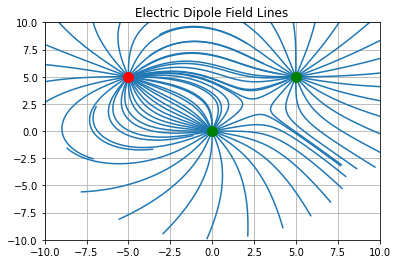

In [134]:
fig, ax = plt.subplots()
for x,y in nparr[:,0]:
    ax.plot(x,y, 'o', color='blue')
ax.grid()
ax.set_xlim(-10, 10)
ax.set_ylim(-10,10)
ax.set_title("Electric Dipole Field Lines")

for nparr in nparrs:
    lines = LineCollection(nparr)
    ax.add_collection(lines)
for charge in charges:
    ax.plot(float(charge[0]), float(charge[1]), 'o', ms=10, color=charge[3])

In [103]:
# dimensions stand for x, y and q (in coulombs)
charges = np.array([[-5, 0, 5], [0, 0, 0], [elem_charge, -elem_charge, elem_charge], ['green', 'red', 'green']]).T
charges

array([['-5', '0', '1.60218e-19', 'green'],
       ['0', '0', '-1.60218e-19', 'red'],
       ['5', '0', '1.60218e-19', 'green']], dtype='<U32')

In [104]:
nparrs = charge_lines(charges, segment_length=.01, num_lines=500)      

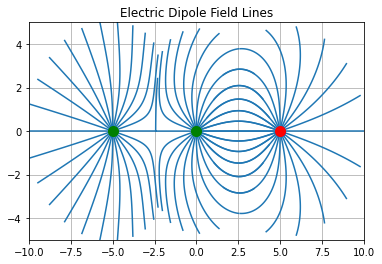

In [110]:
fig, ax = plt.subplots()
for x,y in nparr[:,0]:
    ax.plot(x,y, 'o', color='blue')
ax.grid()
ax.set_xlim(-10, 10)
ax.set_ylim(-5,5)
ax.set_title("Electric Dipole Field Lines")

for nparr in nparrs:
    lines = LineCollection(nparr)
    ax.add_collection(lines)
for charge in charges:
    ax.plot(float(charge[0]), float(charge[1]), 'o', ms=10, color=charge[3])

In [106]:
# dimensions stand for x, y and q (in coulombs)
charges = np.array([[-5, 0, 5], [0, 0, 0], [elem_charge, elem_charge, -elem_charge], ['green', 'green', 'red']]).T
charge

array(['5', '0', '1.60218e-19', 'green'], dtype='<U32')

In [107]:
nparrs = charge_lines(charges, segment_length=.01, num_lines=500)      

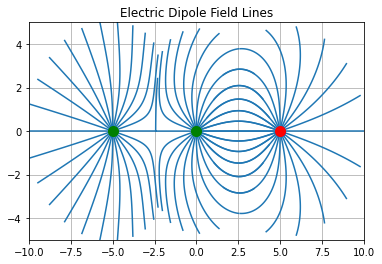

In [109]:
fig, ax = plt.subplots()
for x,y in nparr[:,0]:
    ax.plot(x,y, 'o', color='blue')
ax.grid()
ax.set_xlim(-10, 10)
ax.set_ylim(-5,5)
ax.set_title("Electric Dipole Field Lines")

for nparr in nparrs:
    lines = LineCollection(nparr)
    ax.add_collection(lines)
for charge in charges:
    ax.plot(float(charge[0]), float(charge[1]), 'o', ms=10, color=charge[3])

In [119]:
# dimensions stand for x, y and q (in coulombs)
charges = np.array([[-5, 5, 5, -5], [5, 5, -5, -5], [elem_charge, -elem_charge, elem_charge, -elem_charge], ['green', 'red', 'green', 'red']]).T
charges

array([['-5', '5', '1.60218e-19', 'green'],
       ['5', '5', '-1.60218e-19', 'red'],
       ['5', '-5', '1.60218e-19', 'green'],
       ['-5', '-5', '-1.60218e-19', 'red']], dtype='<U32')

In [120]:
nparrs = charge_lines(charges, segment_length=.1, num_lines=500)

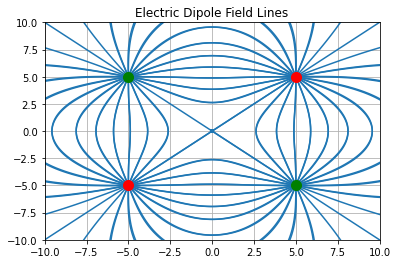

In [121]:
fig, ax = plt.subplots()
for x,y in nparr[:,0]:
    ax.plot(x,y, 'o', color='blue')
ax.grid()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_title("Electric Dipole Field Lines")

for nparr in nparrs:
    lines = LineCollection(nparr)
    ax.add_collection(lines)
for charge in charges:
    ax.plot(float(charge[0]), float(charge[1]), 'o', ms=10, color=charge[3])